<a href="https://colab.research.google.com/github/SithJester/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Michael_Brown_LS_DS_112_Make_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd

In [2]:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

iowa = pd.read_csv(source_url)

iowa.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [3]:
#shape of df

iowa.shape

(1460, 81)

In [4]:
#describe iowa df
iowa[['YearBuilt', 'MSSubClass']].describe()

,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


In [5]:
#Type of data in columns
pd.set_option('display.max_rows',100)
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
# Checking column dtypes

iowa['BedroomAbvGr'].dtype

dtype('int64')

In [7]:
## Calling columns with dot method

iowa.Fireplaces.sample(5)

572     0
1303    0
1428    2
1359    1
417     1
Name: Fireplaces, dtype: int64

In [8]:
iowa['Fireplaces'].sample(3)

564    1
276    0
309    3
Name: Fireplaces, dtype: int64

In [9]:
iowa[['Fireplaces', 'BedroomAbvGr']].sample(3)

,Fireplaces,BedroomAbvGr
635,0,8
328,0,5
1090,0,2


In [10]:
#Checking "lotFrontage"

iowa['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [11]:
#Looking at all possible values for "LotFrontage"

iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [12]:
##Columns that hold NaN values, convert to float values

import numpy as np

type(np.nan)

float

In [13]:
# How much data is missing?

iowa['LotFrontage'].isnull().sum()

259

In [14]:
#shape?

iowa.shape

(1460, 81)

In [0]:
#Getting rid of missing data

iowa['LotFrontage'].dropna(inplace=True)

In [16]:
#Checking 

iowa['LotFrontage'].isnull().sum()

0

In [17]:
## Creating a smaller dataframe with new column headers

small = iowa[['TotalBsmtSF','1stFlrSF','2ndFlrSF', 'SalePrice']].copy()

small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
968,600,600,368,37900
1344,728,728,728,155835
1412,0,1040,0,90000
5,796,796,566,143000
1367,757,925,550,127000


In [18]:
# Adding together the SqFootage to get a total for entire dataset

small['TotalSF'] = small['TotalBsmtSF'] + small["1stFlrSF"] + small['2ndFlrSF']

small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [19]:
## New column for PriceperSqFt
# Divide the price by SF

small['PricePerSF'] = small['SalePrice']/small['TotalSF']

small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
1298,6110,4692,950,160000,11752,13.614704
740,264,768,664,132000,1696,77.830189
1198,1212,1212,0,178000,2424,73.432343


In [0]:
# A high/low PricePerSF shows the realtor the value perSF of the home
## Useful information for the buyer&seller 

In [21]:
#Crosstabs! Dealing with categorical variables

iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
# Categorical columns

iowa[['LotShape','Alley','Street','SaleCondition']].sample(3)


,LotShape,Alley,Street,SaleCondition
404,IR1,NaN,Pave,Normal
1028,Reg,NaN,Pave,Normal
100,IR1,NaN,Pave,Normal


In [23]:
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [24]:
## Creating a new categorical variable

iowa['NormalCondition'] = np.where(iowa['SaleCondition']=='Normal',1,0)

iowa['NormalCondition'].value_counts()

1    1198
0     262
Name: NormalCondition, dtype: int64

In [25]:
# Getting the values for a categorical variable

iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [26]:
# Using the map function to reassign values from 4 -> 3

iowa["LotShape3"] = iowa["LotShape"].map({'Reg':'Regular',
                                          'IR1':'Irregular',
                                          'IR2': 'Other',
                                          'IR3': 'Other'})

iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [27]:
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [28]:
# Replacing values using the .loc method

iowa['top_neighbors'] = 'All Others'
iowa[['top_neighbors', 'Neighborhood']].head()

,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [29]:
#Isolate the preferred values using .

iowa.loc[iowa['Neighborhood']=='NAmes','top_neighbors']= 'North Ames'

iowa[['top_neighbors', 'Neighborhood']].sample(8)

,top_neighbors,Neighborhood
247,North Ames,NAmes
293,All Others,NWAmes
533,All Others,BrkSide
1069,North Ames,NAmes
1046,All Others,StoneBr
225,All Others,BrDale
637,All Others,OldTown
712,All Others,StoneBr


In [30]:
#Reducing values further

iowa.loc[iowa['Neighborhood']=='CollgCr','top_neighbors']='College Circle'
iowa.loc[iowa['Neighborhood']=='Gilbert','top_neighbors']='FavNeighborhood'
iowa.loc[iowa['Neighborhood']=='Somerst','top_neighbors']='FavNeighborhood'

iowa[['top_neighbors', 'Neighborhood']].sample(12)

,top_neighbors,Neighborhood
1282,College Circle,CollgCr
129,North Ames,NAmes
981,All Others,NoRidge
250,All Others,BrkSide
496,All Others,NoRidge
1300,FavNeighborhood,Gilbert
1092,All Others,SWISU
148,All Others,SawyerW
1263,All Others,BrkSide
1317,FavNeighborhood,Somerst


In [31]:
#Checking
iowa['top_neighbors'].value_counts()

All Others         920
North Ames         225
FavNeighborhood    165
College Circle     150
Name: top_neighbors, dtype: int64

In [32]:
# Creating a crosstab for comparison

pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
FavNeighborhood,71,15,79
North Ames,66,2,157


In [33]:
# Adding margins

pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
FavNeighborhood,71,15,79,165
North Ames,66,2,157,225
All,484,51,925,1460


In [34]:
# Adding proportions

pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'],normalize='index',margins=True)
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='columns',margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
FavNeighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


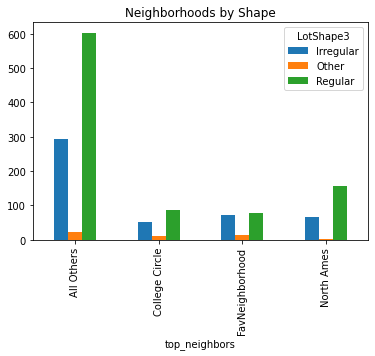

In [35]:
# Display

myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

myresults.plot(kind='bar', title = "Neighborhoods by Shape");

In [36]:
# crosstab comparison for different column

pd.crosstab(iowa['OverallQual'], iowa['top_neighbors'])

top_neighbors,All Others,College Circle,FavNeighborhood,North Ames
OverallQual,,,,
1,2,0,0,0
2,3,0,0,0
3,17,0,0,3
4,94,1,1,20
5,253,28,3,113
6,232,24,44,74
7,159,71,77,12
8,108,23,34,3
9,35,3,5,0


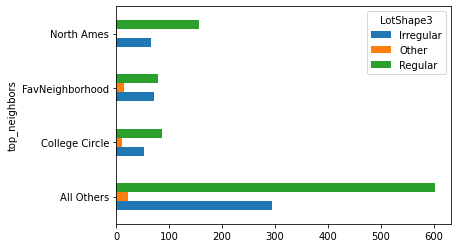

In [37]:
# Creating horizontal graph

myresults.plot(kind='barh');

In [38]:
## Loading new data

! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-12 00:57:27--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.71.0.232, 52.26.240.115, 50.112.20.251
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.71.0.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [        <=>         ]  22.05M  1.93MB/s    in 12s     

2020-05-12 00:57:39 (1.79 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [39]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [40]:
loans = pd.read_csv('LoanStats_2018Q4.csv')

loans.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80   

In [41]:
loans.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [42]:
loans = pd.read_csv('LoanStats_2018Q4.csv',header=1,skipfooter=2)

loans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#looking at shape

loans.shape

(128412, 144)

In [44]:
pd.set_option('display.max_rows',144)

loans.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

In [0]:
## Dropping a column

loans.drop('url',axis=1, inplace=True)

In [46]:
# Cleaning up int_rate column

loans.int_rate.head()

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
Name: int_rate, dtype: object

In [47]:
loans['int_rate'][5]

' 16.14%'

In [48]:
loans['int_rate'].dtype

dtype('O')

In [49]:
type(loans['int_rate'][5])

str

In [50]:
# Fix one to test

int_rate = ' 16.14%'

float(int_rate.strip().strip('%'))

16.14

In [51]:
# Check
type(float(int_rate.strip().strip('%')))

float

In [52]:
## Creating a function to use repeatedly

def myfunc(input_val):
    return float(input_val.strip().strip('%'))

## testing

myfunc(int_rate)

16.14

In [53]:
## Applying solution to every cell in columns

listed = []
for cell in loans['int_rate']:
  listed.append(myfunc(cell))

listed[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [54]:
# Comparing OG

loans['int_rate'].head()
list(loans['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [55]:
# Conversion and comparison

loans['int_rate_clean'] = pd.Series(listed)

loans[['int_rate','int_rate_clean']].sample(10)

,int_rate,int_rate_clean
45171,10.72%,10.72
80789,7.84%,7.84
74109,8.46%,8.46
57006,11.80%,11.80
60180,7.02%,7.02
33393,16.91%,16.91
23684,11.80%,11.80
111885,26.31%,26.31
78195,19.92%,19.92
81837,12.73%,12.73


In [56]:
## Checking data type of column

loans['int_rate_clean'].dtype

dtype('float64')

In [57]:
## Using .apply to clean up the column

loans['int_rate_clean2'] = loans['int_rate'].apply(myfunc)

loans[['int_rate', 'int_rate_clean', 'int_rate_clean2']].sample(10)

,int_rate,int_rate_clean,int_rate_clean2
82538,8.46%,8.46,8.46
60135,24.37%,24.37,24.37
95949,13.56%,13.56,13.56
11300,13.56%,13.56,13.56
78601,10.47%,10.47,10.47
94267,8.46%,8.46,8.46
58102,7.02%,7.02,7.02
38306,7.02%,7.02,7.02
30184,10.72%,10.72,10.72
89921,10.08%,10.08,10.08


In [58]:
loans['emp_title'].head(20)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
15               Reimbursement specialist 
16                       Financial Advisor
17                                Engineer
18                   Sales Account Manager
19                                     Cna
Name: emp_title, dtype: object

In [59]:
loans['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [60]:
## Unique titles?

print(loans.shape)
len(loans['emp_title'].unique())

(128412, 145)


43893

In [61]:
# Or

loans['emp_title'].nunique()

43892

In [62]:
# Null? 

loans['emp_title'].isnull().sum()

20947

In [63]:
type('Supervisor')
isinstance('Supervisor', str)

True

In [0]:
## Create function to clean up titles

examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

def clean_title(jobtitle):
  if isinstance(jobtitle, str):
    return (jobtitle.title().strip())
  else:
    return 'Unknown'

In [65]:
clean_title(' suPerViSor')
clean_title(np.nan)

'Unknown'

In [66]:
## for loop 
 
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))

mylist

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [67]:
# List comprehension

[clean_title(jobtitle) for jobtitle in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [68]:
loans['clean_title'] = loans['emp_title'].apply(clean_title)

loans[['emp_title', 'clean_title']].sample(15)

,emp_title,clean_title
37691,Fitness Instructor/Personal Trainer,Fitness Instructor/Personal Trainer
19215,Interface Engineer,Interface Engineer
69246,claims spec,Claims Spec
40626,Investigator,Investigator
86319,NaN,Unknown
24648,Executive Chef,Executive Chef
127654,Police officer,Police Officer
1135,Guest Services,Guest Services
43361,Visual Desinger,Visual Desinger
21857,Case planner,Case Planner


In [69]:
## Listing columns

loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=146)

In [70]:
loans['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [71]:
## using a for loop to pull columns

date_list = []

for col in loans.columns:
  if col.endswith('_d'):
    date_list.append(col)

date_list

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [72]:
# List comprehension

date_cols = [col for col in loans.columns if col.endswith('_d')]

date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [73]:
## datetime_format

loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)

loans[['issue_d', 'new_issue_d']].head()

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [74]:
type(loans['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [75]:
print(loans['new_issue_d'].dtype)
loans['new_issue_d'].dtype


datetime64[ns]


dtype('<M8[ns]')

In [76]:
loans['new_issue_d'].head(3).values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [77]:
#shortcut for pulling specific parts of datetime

## Year

loans['year'] = loans['new_issue_d'].dt.year
loans[['issue_d','new_issue_d', 'year']].head()


,issue_d,new_issue_d,year
0,Dec-2018,2018-12-01,2018
1,Dec-2018,2018-12-01,2018
2,Dec-2018,2018-12-01,2018
3,Dec-2018,2018-12-01,2018
4,Dec-2018,2018-12-01,2018


In [78]:
#Month

loans['month'] = loans['new_issue_d'].dt.month
loans[['issue_d', 'new_issue_d', 'year', 'month']].head()


,issue_d,new_issue_d,year,month
0,Dec-2018,2018-12-01,2018,12
1,Dec-2018,2018-12-01,2018,12
2,Dec-2018,2018-12-01,2018,12
3,Dec-2018,2018-12-01,2018,12
4,Dec-2018,2018-12-01,2018,12


In [79]:
# Weekday

loans['weekday'] = loans['new_issue_d'].dt.weekday
loans[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(8)

,issue_d,new_issue_d,year,month,weekday
111871,Oct-2018,2018-10-01,2018,10,0
63413,Nov-2018,2018-11-01,2018,11,3
62299,Nov-2018,2018-11-01,2018,11,3
29337,Dec-2018,2018-12-01,2018,12,5
105408,Oct-2018,2018-10-01,2018,10,0
15588,Dec-2018,2018-12-01,2018,12,5
37160,Dec-2018,2018-12-01,2018,12,5
82841,Oct-2018,2018-10-01,2018,10,0


In [80]:
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.month
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


In [81]:
loans['day_diff']=loans['new_issue_d'] - loans['new_pull']

loans[['last_credit_pull_d', 'new_pull', 'day_diff']].head()

,last_credit_pull_d,new_pull,day_diff
0,Dec-2019,2019-12-01,-365 days
1,Apr-2020,2020-04-01,-487 days
2,Feb-2020,2020-02-01,-427 days
3,Apr-2020,2020-04-01,-487 days
4,Apr-2020,2020-04-01,-487 days


In [82]:
loans['day_diff'].value_counts().sort_index().tail()

-30 days     87
0 days      475
30 days      73
31 days      33
61 days       1
Name: day_diff, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [83]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-12 00:58:01--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.4.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.4.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  71.7MB/s    in 2.7s    

2020-05-12 00:58:04 (71.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [84]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [85]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [0]:
## Creating dataframes to be combined later

Dept = pd.read_csv('departments.csv')
Aisles = pd.read_csv('aisles.csv')
Prior_Order = pd.read_csv('order_products__prior.csv') 
Train_Order = pd.read_csv('order_products__train.csv')
Orders = pd.read_csv('orders.csv')
Products =  pd.read_csv('products.csv')

In [88]:
#Checking data
Dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
#Organize the data with dept_id as the index to eliminate redundancy

Dept.set_index('department_id',inplace=True)

In [90]:
Dept.sample(3)

,department
department_id,
19,snacks
11,personal care
1,frozen


In [91]:
#Find missing values

Dept.isnull().sum()

department    0
dtype: int64

In [92]:
## Execute the same organization methods for each data set

Aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [93]:
Aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [94]:
Aisles.set_index('aisle_id',inplace=True)

Aisles.sample(3)

,aisle
aisle_id,
18,bulk dried fruits vegetables
96,lunch meat
134,specialty wines champagnes


In [95]:
Prior_Order.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [96]:
Prior_Order.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [0]:
Prior_Order.set_index('order_id',inplace=True)

In [98]:
Prior_Order.sample(3)

,product_id,add_to_cart_order,reordered
order_id,,,
1258182,9595,22,0
2163271,30391,11,1
1944954,34126,1,0


In [99]:
#Locating the NaN value, it looks like its on a single order 
## This can be dismissed

PO_Null = Prior_Order[Prior_Order['add_to_cart_order'].isna()]

PO_Null

,product_id,add_to_cart_order,reordered
order_id,,,


In [100]:
## Create a comparison to show which products are reordered most often

FreqProdOrder = pd.crosstab(Prior_Order['product_id'],Prior_Order['reordered'])

FreqProdOrder.head()

reordered,0,1
product_id,,
1,716,1136
2,78,12
3,74,203
4,182,147
5,6,9


In [101]:
## Which product is ordered the most?

Prior_Order['product_id'].value_counts().sort_values(ascending=False)

## Here we can see the top 5 

24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
10806         1
13397         1
45273         1
23653         1
30087         1
Name: product_id, Length: 49677, dtype: int64

In [0]:
## To locate the most popular products, I'll call the Products dataframe and extract information

In [103]:
Products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [104]:
Products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [0]:
Products.set_index('product_id',inplace=True)

In [106]:
Products.sample(3)

,product_name,aisle_id,department_id
product_id,,,
10889,No Pulp Calcium + Vitamin D 100% Pure Orange J...,31,7
31640,Original Puffins Cereal,121,14
28294,Candles Birthday White,6,2


In [107]:
## The most popular products ordered through instacart are:
## P_id - 24852, 13176, 21137, 21903,  47209 


Products.loc[24852]

product_name     Banana
aisle_id             24
department_id         4
Name: 24852, dtype: object

In [108]:
Products.loc[13176]

product_name     Bag of Organic Bananas
aisle_id                             24
department_id                         4
Name: 13176, dtype: object

In [109]:
Products.loc[21137]

product_name     Organic Strawberries
aisle_id                           24
department_id                       4
Name: 21137, dtype: object

In [110]:
Products.loc[21903]

product_name     Organic Baby Spinach
aisle_id                          123
department_id                       4
Name: 21903, dtype: object

In [111]:
Products.loc[47209]

product_name     Organic Hass Avocado
aisle_id                           24
department_id                       4
Name: 47209, dtype: object

In [112]:
# Create a table of the most popular items


FavProd = [Products.loc[24852], Products.loc[13176],Products.loc[21137], Products.loc[21903], Products.loc[47209]]

FavProduct = pd.DataFrame(FavProd)

FavProduct

,product_name,aisle_id,department_id
24852,Banana,24,4
13176,Bag of Organic Bananas,24,4
21137,Organic Strawberries,24,4
21903,Organic Baby Spinach,123,4
47209,Organic Hass Avocado,24,4


In [113]:
## Clean it up

FavProduct.rename(columns={'product_name':"Product_Name",'aisle_id':'Aisle_ID','department_id':'Dept_ID'}, inplace=True)

FavProduct.rename_axis('Product_ID',index=0)

,Product_Name,Aisle_ID,Dept_ID
Product_ID,,,
24852,Banana,24,4
13176,Bag of Organic Bananas,24,4
21137,Organic Strawberries,24,4
21903,Organic Baby Spinach,123,4
47209,Organic Hass Avocado,24,4


In [0]:
## Now to create a crosstab showing when the top 5 
## were last ordered 

In [115]:
pd.crosstab(Orders['days_since_prior_order'], FavProduct['Product_Name'])

Product_Name,Bag of Organic Bananas,Banana,Organic Baby Spinach,Organic Hass Avocado,Organic Strawberries
days_since_prior_order,,,,,
1.0,0,0,0,0,1
5.0,1,0,0,0,0
7.0,0,0,0,1,0
18.0,0,1,0,0,0
30.0,0,0,1,0,0


In [116]:
# I'd like to find out when the busiest hours are 

Orders['order_hour_of_day'].value_counts()

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

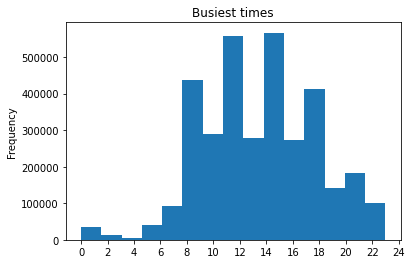

In [120]:
Orders['order_hour_of_day'].plot.hist(bins = 15, title= "Busiest times", xticks = range(0,25,2));